<H3>Some exercises in inference for MLR</H3>
Let's read a datafile containing nutrition information on a bunch
of breakfast cereals. We want to construct an MLR model 
to predict calories from the other variables.  After that 
we will caryy out some inferences.

calories protein fat fiber
1  70      4       1   10.0 
2 120      3       5    2.0 
3  70      4       1    9.0 
4  50      4       0   14.0 
5 110      2       2    1.0 
6 110      2       2    1.5

calories    protein    fat        fiber      
calories  1.00000000 0.01906607 0.49860981 -0.29341275
protein   0.01906607 1.00000000 0.20843099  0.50033004
fat       0.49860981 0.20843099 1.00000000  0.01671924
fiber    -0.29341275 0.50033004 0.01671924  1.00000000

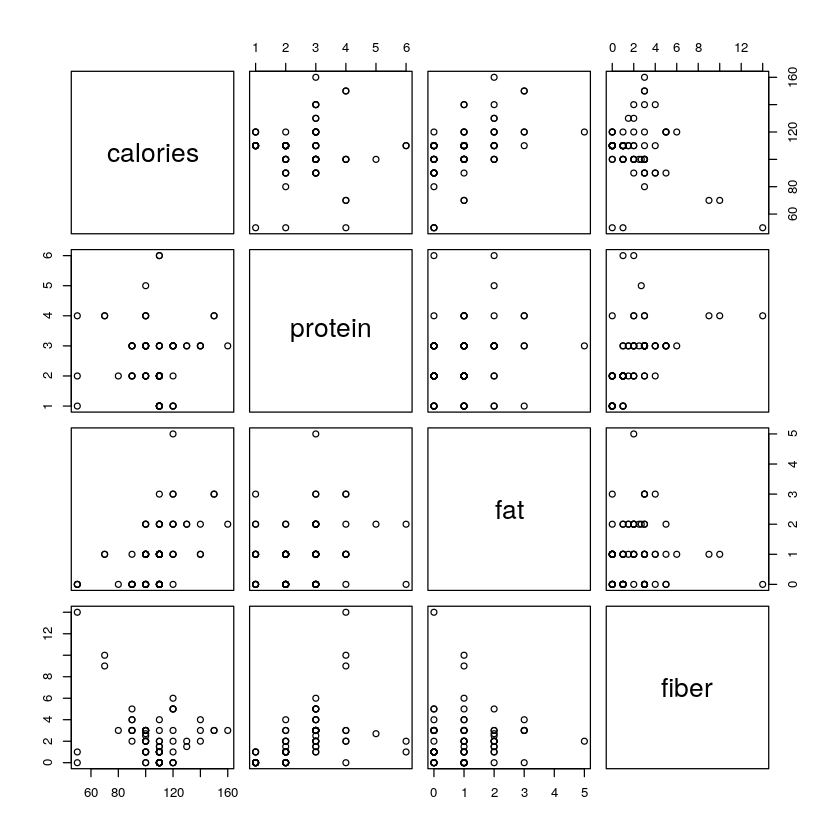

In [4]:
# Read data file
ex1dat = read.csv(file="https://cs.earlham.edu/~pardhan/sage_and_r/breakfast_cereals.csv", header=TRUE, sep=",")
head(ex1dat)

# Make scatterplot and correlation matrix:
plot(ex1dat)
cor(ex1dat)

In [6]:
# Fit MLR model for calories vs all other variables
lmresults = lm(calories ~ protein+fat+fiber, data=ex1dat)
summary (lmresults)


Call:
lm(formula = calories ~ protein + fat + fiber, data = ex1dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-50.955  -6.907  -0.350   8.017  45.511 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  99.3222     4.7886  20.742  < 2e-16 ***
protein       1.6328     2.0002   0.816  0.41698    
fat           9.3948     1.8841   4.986 4.02e-06 ***
fiber        -2.8402     0.8987  -3.160  0.00229 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 16.08 on 73 degrees of freedom
Multiple R-squared:  0.3457,	Adjusted R-squared:  0.3188 
F-statistic: 12.85 on 3 and 73 DF,  p-value: 7.847e-07


<H3>Inference questions</H3>
* Is the model as a whole a significant predictor of the response?<BR>
* Is fat a significant predictor of calories? <BR>
* Is protein a significant predictor of calories? <BR>
    
<P>
<H4>Hypothesis test for the model as a whole</H4>
Null hypothesis: None of the slopes is a significant predictor <BR>
Alt hypothesis: At least one slope is a significant predictor <P>
In symbols: <BR>
$H_0: \beta_p = \beta_{fat} = \beta_{fib}=0$  <BR>
$H_A:$ At leat one of the $\beta's \ne 0$ <P>
    
Look at the $F$-statistic with the indicated $df$, 
and the $P$-value.  <BR>
Reject $H_0$ if the $P$-value is below significance level. <P>
    
<B>Conclusion</B> Since the $P$-value is less than $\alpha$, 
we reject $H_0$ and conclude that the model 
as a whole a significant predictor of calories.  <P>
    
<H4>Is fat a significant predictor of calories?</H4>
$H_0: \beta_{fat}=0$ when the model includes all other variables. <BR>
$H_A: \beta_{fat}\ne 0$ when the model includes all variables. <P>
    
Find the relevant $t$-statistic and $P$-value: <BR>
    $t=\frac{b_{fat}-0}{SE_{fat}} = \frac{9.3948-0}{1.884} 
    = 4.99$  <BR>
    With $df=n-k-1=77-3-1=73$, the $P$-value=$4.02\times 10^{-6}$ <P>
<B>Conclusion</B> Since the $P$-value is less than $\alpha$, 
we reject $H_0$ and conclude that fat is  
a significant predictor of calories.  <P>
    
<H4>Is protein a significant predictor of calories?</H4>
$H_0: \beta_{p}=0$ when the model includes all other variables. <BR>
$H_A: \beta_{p}\ne 0$ when the model includes all variables. <P>
    
Find the relevant $t$-statistic and $P$-value: <BR>
From the regression output: $t=0.816$ and the $P$-value=$0.417$ <P>
<B>Conclusion</B> Since the $P$-value is high we retain $H_0$ and conclude that protein is not a significant predictor of calories.  <P>

<H3>Confidence intervals</H3>
We can compute a confidence interval for the slope of each predictor. <BR>
Suppose we want a 90% confidence interval for the slope of fat.  <P>
    
CI = estimate $~\pm \; t^*_{df} \cdot SE$  <P>
From the regression output: estimate = 9.3948, $SE= 1.8841$, df=73, 
    $t^*_{73} = 1.666$ (for 90% confidence).  <P>
CI $= 9.3948 \pm 1.666 \times 1.8841 = (6.26, 12.53)$  <P>
    
<B>Conclusion</B>: We are 90% confident that, all else being equal, the model 
predicts that for each additional gram of fat, the increase in calories 
is between 6.26 and 12.53.

<HR><BR><HR>
<H2>Exercise/Lab project for turn in</H2>
The file "movies.cvs" contains data on some movies, and the   
variables that might be related to the amount of money those 
movies generated.  We want to construct an MLR model 
to predict the amount of money the movie made from 
the 3 predictor variables <I>Budget</I>, <I>Stars</I>, 
and <I>Run_Time</I>.  The units of <I>USGross</I> and 
<I>Budget</I> are million dollars, and <I>Run_Time</I> is in 
minutes.  Carry out each of the following tasks: 
<OL>
  <LI>Make a matrix of scatterplots and correlations for these variables.  
    Comment on what these plots and correlations suggest about 
    the relationship between <I>USGross</I> and the 3 predictor variables.</LI>
  <LI>Construct an MLR model, and write the model in the form 
  of an equation.  </LI>
  <LI>Interpret each slope in context.  </LI>
  <LI>Interpret the adjusted $R^2$ in context.  </LI>
  <LI>Is the model as a whole a significant predictor of the response? Carry out a hypothesis test and state your conclusion.</LI>
  <LI>Carry out a hypothesis test to determine whether the <I>Budget</I> is 
  a significant predictor.</LI>
  <LI>Compute and interpret a confidence interval for the slope 
  of the <I>Budget</I> predictor.  </LI>
</OL>

In [12]:
movdat = read.csv(file="https://cs.earlham.edu/~pardhan/sage_and_r/movies.csv", header=TRUE, sep=",")
head(movdat)

Movie                  USGross   Budget Stars Rating Genre  Run_Time
1 White Noise            56.09436  30     2     PG-13  Horror 101     
2 Coach Carter           67.264877 45     3     PG-13  Drama  136     
3 Elektra                24.409722 65     2     PG-13  Action 100     
4 Racing Stripes         49.772522 30     3     PG     Comedy 110     
5 Assault on Precinct 13 20.040895 30     3     R      Action 109     
6 Are We There Yet?      82.674398 20     2     PG     Comedy  94